<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/07_AnalisiEsplorativaUnivariata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisi Esplorativa Univariata

In questo notebook si effettua uno studio di analisi esplorativa univariata prendendo come riferimento il dataset "Telco Customer Churn" disponibile sul portale kaggle. Il dataset è scaricabile all'indirizzo:

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

e contiene i dati di abbandono di clienti di una ipotetica società dal nome Telco, operante nel settore telecomunicazioni, che ha fornito servizi di telefonia domestica e Internet a 7043 clienti in California in un certo periodo.

##Contenuto del dataset
Ogni riga rappresenta un cliente, ogni colonna contiene gli attributi del cliente, che includono varie informazioni.
* Informazioni generali sui clienti:
  * identificativo (Colonna "customerID");
  * genere (colonna "gender");
  * fascia d'età (colonna "SeniorCitizen");
  * presenza di partner (colonna "Partner");
  * presenza di persone a carico (colonna "Dependents").
* Informazioni sull'account del cliente:
  * da quanto tempo è cliente (colonna "tenure");
  * tipologia di contratto (colonna "Contract");
  * metodo di pagamento (colonna "PaymentMethod");
  * fattura cartacea o meno (colonna "PaperlessBilling");
  * spesa mensile (colonna "MonthlyCharges");
  * spesa complessiva (colonna "TotalCharges").
* Servizi sottoscritti da ciascun cliente:
  * telefono (Colonna "PhoneService");
  * linee multiple (Colonna ("MultipleLines");
  * tipologia connessione Internet (Colonna ("InternetService");
  * sicurezza online (Colonna ("OnlineSecurity");
  * backup online (Colonna ("OnlineBackup");
  * protezione dei dispositivi (Colonna ("DeviceProtection");
  * assistenza tecnica  (Colonna ("TechSupport");
  * servizi di streaming  (Colonna ("StreamingMovies").
* Abbandono eventuale dell'azienda nell'ultimo mese (Colonna "Churn").

## Azioni preliminari

Importazione librerie necessarie e montaggio del Drive per accedere ai file necessari.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
# Percorso alla directory che contiene i file da utilizzare
# Percorso da modificare in base alla propria macchina
folder_path = '/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/FileDiSupporto'

# Creiamo la directory che conterrà i grafici creati (se non esiste)
os.makedirs('/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/Plots', exist_ok=True)

## Caricamento del dataset e ispezione preliminare

In [9]:
# Caricamento del dataset
file_path = os.path.join(folder_path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(file_path)

# Ispezione preliminare
print("\nDimensioni del dataset:", df.shape)
print("\nPrime righe del dataset:\n", df.head())
print("\nPanoramica sintetica del DataFrame:\n")
print(df.info())
print("\nValori mancanti per colonna:\n", df.isnull().sum())


Dimensioni del dataset: (7043, 21)

Prime righe del dataset:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   


Osserviamo che la variabile 'TotalCharges' è di tipo `object`. In realtà, trattandosi di un valore numerico, in particolare decimale, è preferibile convertirla in `float64`, così come la variabile 'MonthlyCharges'. Analogamente, la variabile 'SeniorCitizen' è di tipo `int64`, ma contiene solo valori 0/1. Pertanto, è preferibile convertirla in `object`.

Successivamente, definiamo due diversi sottoinsiemi del dataset, per differenziare le variabili numeriche (tipo di dato `int64` e `float64`) da quelle categoriche (tipo di dato `object`).

In [10]:
# Conversione di TotalCharges in float64
# L'istruzione errors='coerce' gestisce la presenza di eventuali valori non
# convertibili direttamente in float64 (ad esempio, valori non numerici o
# stringhe), trasformandoli in NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Conversione di SeniorCitizen in object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# Verifichiamo la presenza di NaN nelle colonne appena convertite
print("\n Valori NaN nella colonna 'TotalCharges':\n", df['TotalCharges'].isna().sum())
print("\n Valori NaN nella colonna 'SeniorCitizen':\n", df['SeniorCitizen'].isna().sum())


 Valori NaN nella colonna 'TotalCharges':
 11

 Valori NaN nella colonna 'SeniorCitizen':
 0


Dato che si tratta di pochi valori (11 su 7043), optiamo per la rimozione delle osservazioni interessate.

In [11]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [12]:
# Distinzione tra variabili numeriche e categoriche
numeriche = df.select_dtypes(include=['int64', 'float64']).columns
categoriche = df.select_dtypes(include=['object']).columns

print("\n Variabili Numeriche:", list(numeriche))
print("\n Variabili Categoriche:", list(categoriche))


 Variabili Numeriche: ['tenure', 'MonthlyCharges', 'TotalCharges']

 Variabili Categoriche: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Statistiche descrittive relative alle variabili numeriche

Diamo avvio alla fase di analisi esplorativa. Iniziamo ricavando le statistiche descrittive relative alle variabili numeriche.

In [13]:
# Percorso alla directory che contiene i file da utilizzare
# Percorso da modificare in base alla propria macchina
folder_path = '/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/FileDiSupporto'

print("\n Statistiche descrittive variabili numeriche:\n", df[numeriche].describe())


 Statistiche descrittive variabili numeriche:
             tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


## Analisi grafica delle variabili numeriche

Generiamo le immagini relative all'istogramma ed al boxplot di ogni variabile numerica.

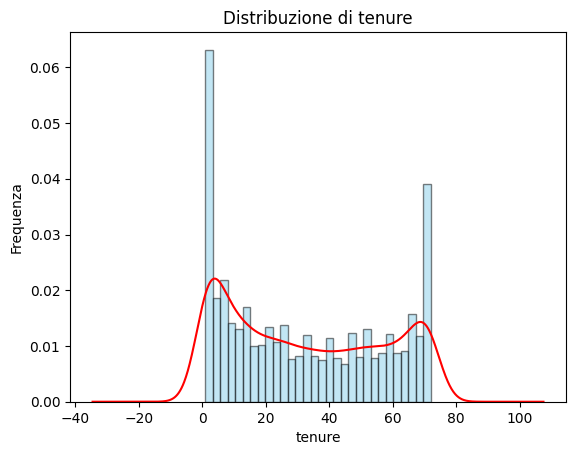

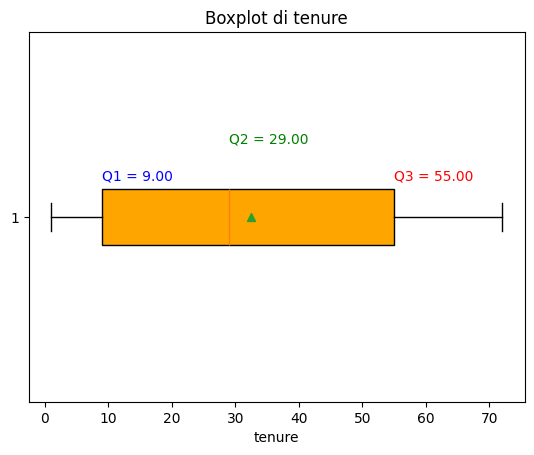

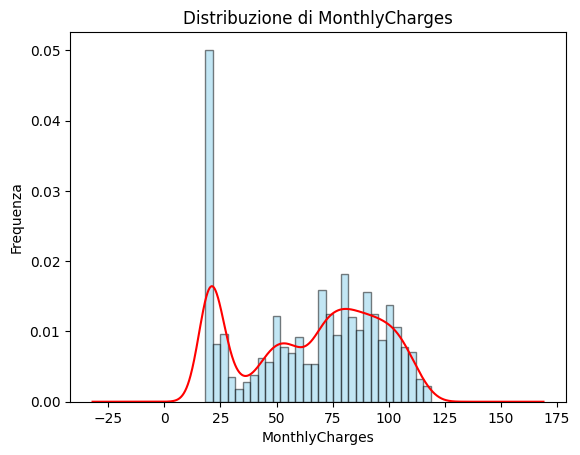

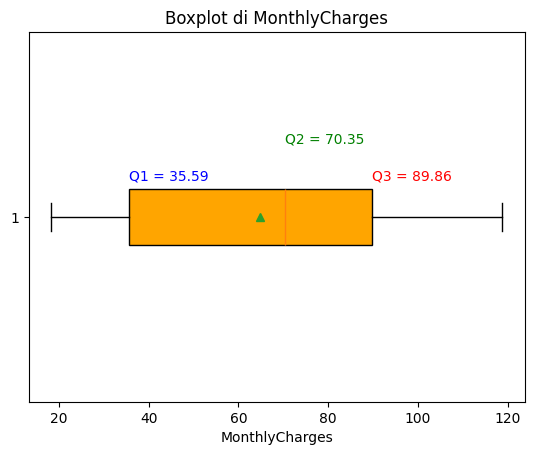

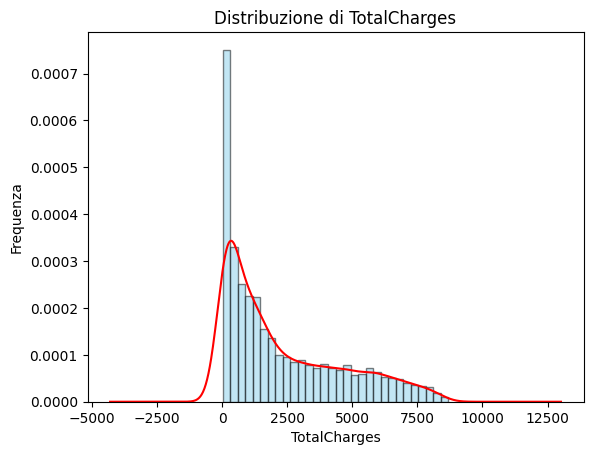

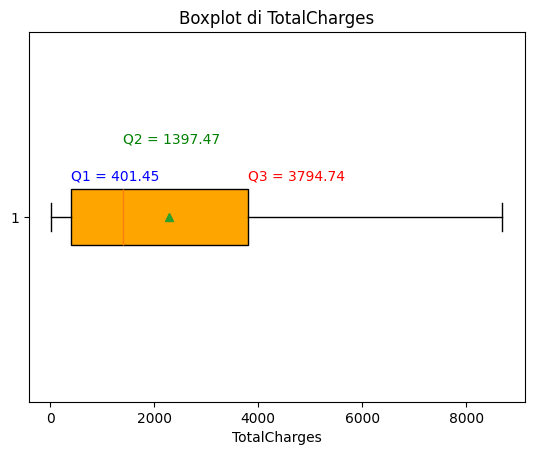

In [14]:
# Percorso alla directory che conterrà le immagini generate
# Percorso da modificare in base alla propria macchina
folder_path_plots = '/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/Plots'

import seaborn as sns

for col in numeriche:
  file_path_hist = os.path.join(folder_path_plots, f'hist_{col}.png')
  # Istogramma
  plt.figure()
  #plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')

  istogramma = df[col].plot(kind='hist', bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')
  df[col].plot(kind='kde', color='red', ax=istogramma)

  plt.title(f'Distribuzione di {col}')
  plt.xlabel(col)
  plt.ylabel('Frequenza')
  plt.savefig(file_path_hist)
  plt.show()
  plt.close()

  # Boxplot
  # Calcolo dei quantili
  q1 = np.percentile(df[col], 25)
  q2 = np.percentile(df[col], 50)  # Mediana
  q3 = np.percentile(df[col], 75)

  file_path_boxplot = os.path.join(folder_path_plots, f'boxplot_{col}.png')
  plt.figure()
  plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='orange'), showmeans=True)
  plt.title(f'Boxplot di {col}')
  plt.xlabel(col)
  # Aggiungi i valori dei quantili sul plot
  plt.text(q1, 1.1, f'Q1 = {q1:.2f}', color='blue')
  plt.text(q2, 1.2, f'Q2 = {q2:.2f}', color='green')
  plt.text(q3, 1.1, f'Q3 = {q3:.2f}', color='red')
  plt.savefig(file_path_boxplot)
  plt.show()
  plt.close()

Osserviamo che
* 'tenure' è asimmetrica a destra, dato che la media è maggiore della mediana;
* 'MonthlyCharges' è asimmetrica a sinistra, dato che la mediana è maggiore della media;
* 'TotalCharges' è asimmetrica a destra, dato che la media è maggiore della mediana.

## Analisi grafica delle variabili categoriche

Generiamo le immagini relative al diagramma a barre di ogni variabile categorica. In ordinata riportiamo la frequenza assoluta di ogni valore, ma - per ulteriore chiarezza - all'interno di ogni barra riportiamo la frequenza relativa, espressa in %.

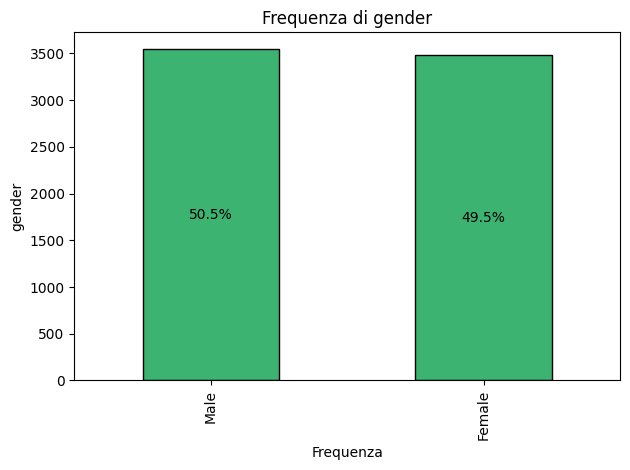

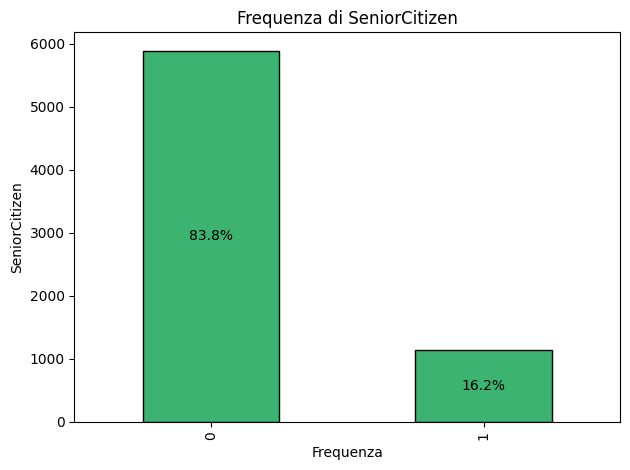

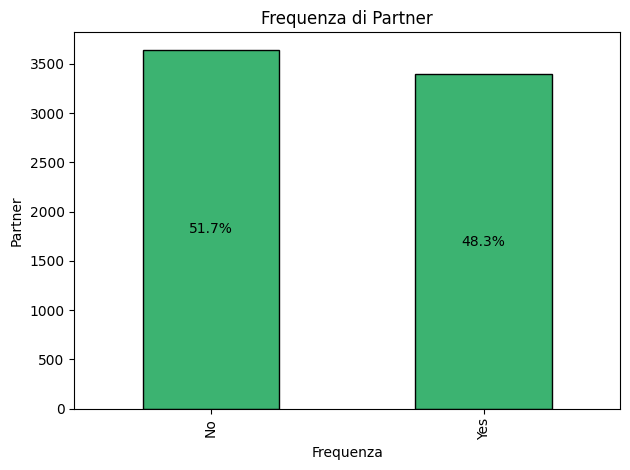

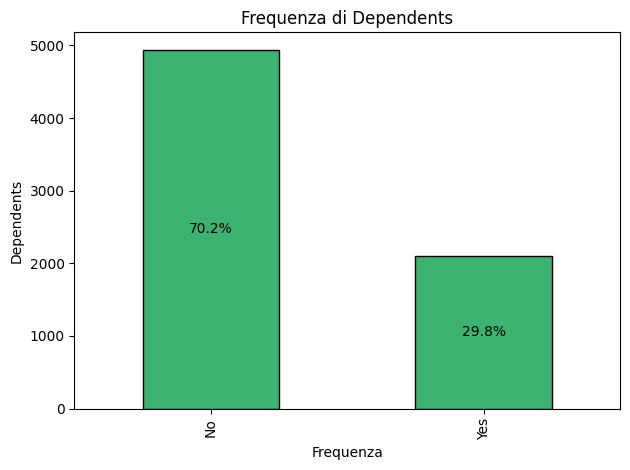

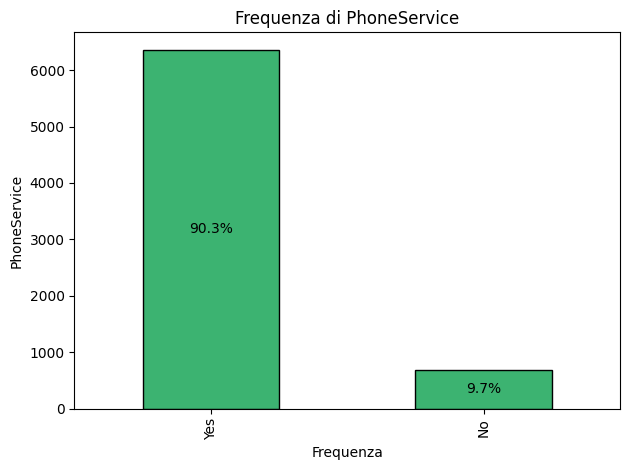

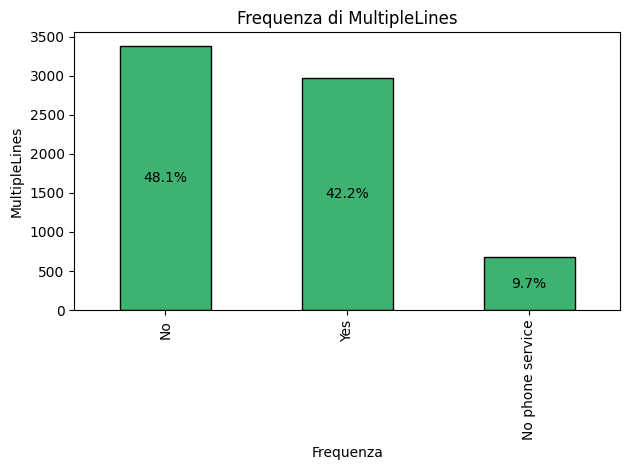

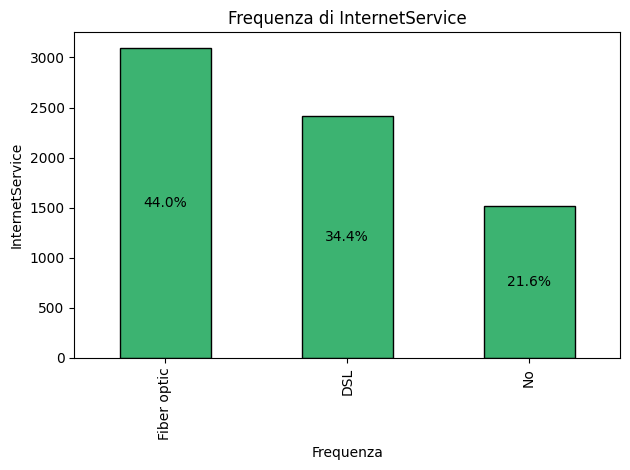

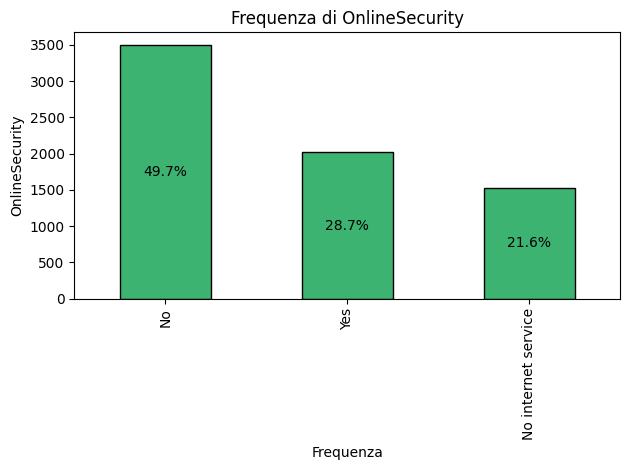

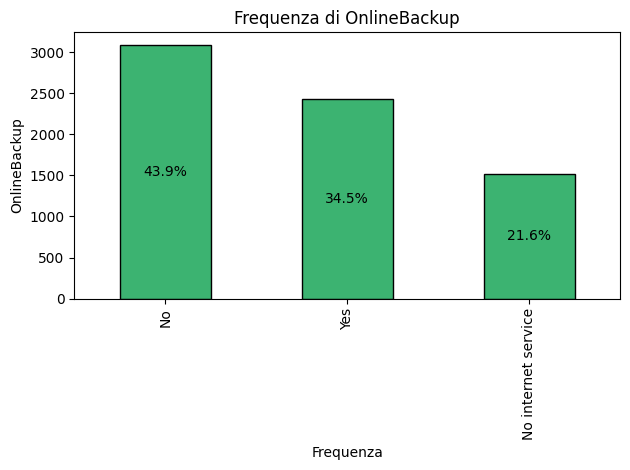

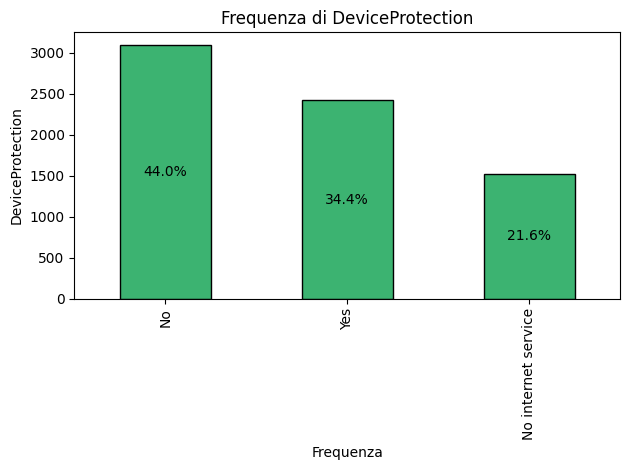

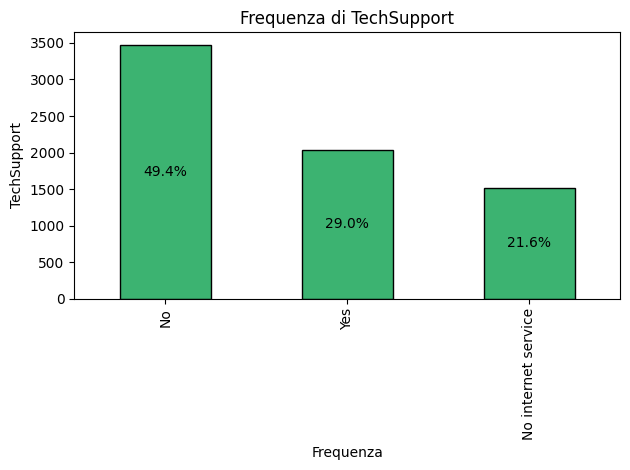

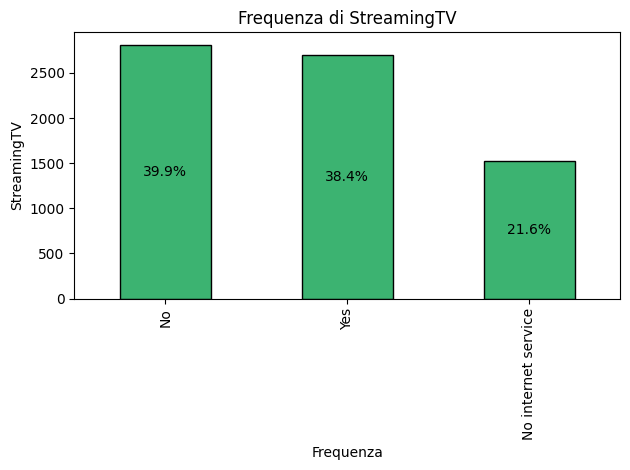

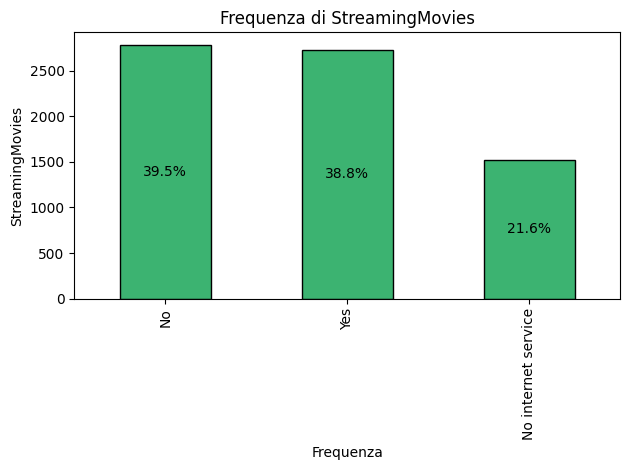

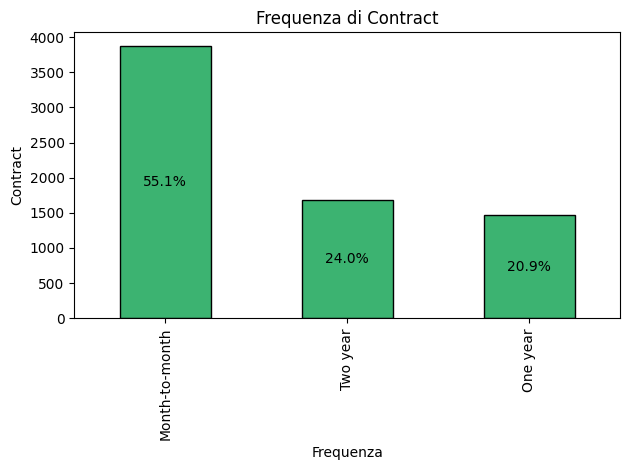

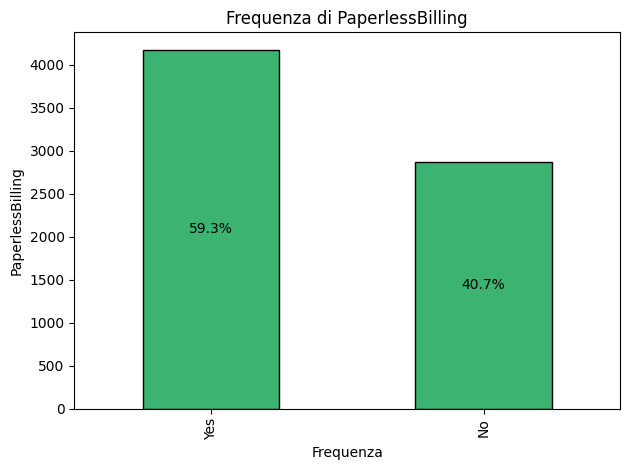

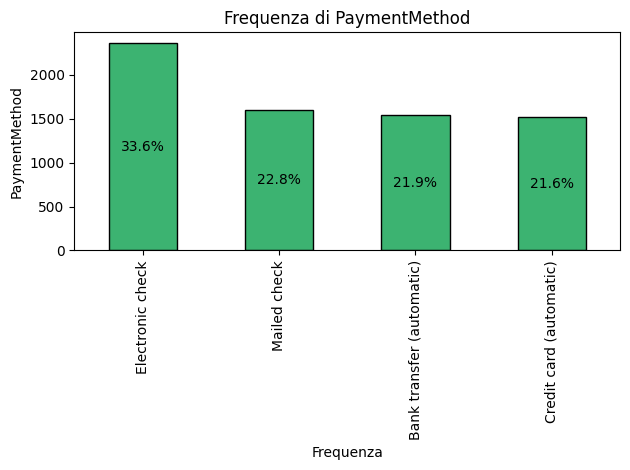

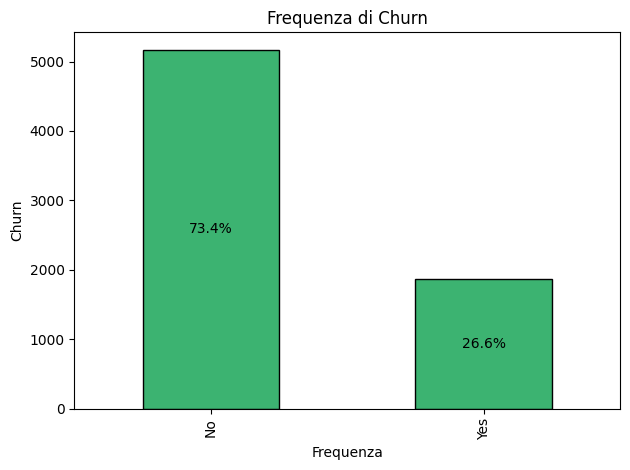

In [15]:
for col in categoriche:
  # print(f"Valori unici e frequenze per '{col}':\n", df[col].value_counts())

  if col in ['customerID']:
    continue  # Salta questa iterazione

  file_path_barchart = os.path.join(folder_path_plots, f'count_{col}.png')
  plt.figure()
  frequenze = df[col].value_counts()

  # Calcolo la percentuale per ogni categoria
  percentuali = (frequenze / frequenze.sum()) * 100
  bar_chart = frequenze.plot(kind='bar', color='mediumseagreen', edgecolor='black')

  # Aggiunta delle percentuali all'interno ogni barra
  for i, (freq, perc) in enumerate(zip(frequenze, percentuali)):
    bar_chart.text(i, freq / 2, f'{perc:.1f}%', ha='center', va='center', fontsize=10, color='black')

  plt.title(f'Frequenza di {col}')
  plt.xlabel('Frequenza')
  plt.ylabel(col)
  plt.tight_layout()
  plt.savefig(file_path_barchart)
  plt.show()
  plt.close()

## Analisi degli outlier per le variabili numeriche

Verifichiamo la presenza di outlier per le variabili numeriche. Utilizziamo il metodo basato sulla distanza interquartilica ($IQR = Q_3 - Q_1$), in base alla quale un'osservazione è classificabile come outlier se $< Q_1 + 1.5*IQR$ oppure $> Q_3 + 1.5*IQR$.

In [18]:
# Calcolo Outlier relativi alle variabili numeriche (Metodo IQR)

outlier_report = {}

for col in numeriche:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
  outlier_count = outliers.count()

  outlier_report[col] = {
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound,
    'Conteggio Outlier': outlier_count,
    'Percentuale Outlier': (outlier_count / df.shape[0]) * 100
  }

# Stampa e salva il report degli outlier
outlier_df = pd.DataFrame(outlier_report).T
print("\n Report Outlier per variabili numeriche:\n", outlier_df)

# Salva il report in formato CSV
file_path_outlier = os.path.join(folder_path_plots, 'outlier_report.csv')
outlier_df.to_csv(file_path_outlier)


 Report Outlier per variabili numeriche:
                       Q1         Q3        IQR  Lower Bound  Upper Bound  \
tenure            9.0000    55.0000    46.0000    -60.00000    124.00000   
MonthlyCharges   35.5875    89.8625    54.2750    -45.82500    171.27500   
TotalCharges    401.4500  3794.7375  3393.2875  -4688.48125   8884.66875   

                Conteggio Outlier  Percentuale Outlier  
tenure                        0.0                  0.0  
MonthlyCharges                0.0                  0.0  
TotalCharges                  0.0                  0.0  
